# Dataframe

In [1]:
import pandas as pd

fall_all_d = pd.read_pickle(r'D:\teddy\Documents\UNIVALI\TCC III\TCC-iii\Dataframes\FallAllD.pkl')
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag
0,1,Waist,13,1,"[[4062, -1428, -45], [4190, -1422, -24], [4302...","[[1355, 21, 159], [1334, -19, 168], [1318, -68...","[[5541, 1551, 2887], [5568, 1587, 2956], [5605..."
1,1,Waist,13,2,"[[3737, -1549, 158], [3729, -1553, 160], [3728...","[[-4, 0, -1], [-7, 11, -3], [-11, 11, -2], [-1...","[[5185, 2842, 2267], [5220, 2876, 2260], [5211..."
2,1,Waist,13,5,"[[3954, -401, -107], [3894, -346, -108], [3835...","[[177, 173, 177], [160, 183, 164], [152, 197, ...","[[5626, 2148, 3057], [5602, 2127, 3015], [5562..."
3,1,Waist,13,6,"[[3992, -682, -33], [3988, -694, -31], [3985, ...","[[12, 13, 9], [15, 12, 10], [11, 12, 9], [9, 1...","[[5530, 2536, 2713], [5521, 2561, 2774], [5493..."
4,1,Waist,13,9,"[[2223, 167, -18], [2139, 222, -90], [2108, 25...","[[-396, -163, 33], [-338, -62, 54], [-272, 44,...","[[5752, 2071, 2723], [5801, 2220, 2615], [5776..."
...,...,...,...,...,...,...,...
1793,15,Waist,131,2,"[[3805, 827, 464], [3822, 855, 481], [3836, 80...","[[125, -157, -474], [114, -161, -460], [108, -...","[[2863, 617, 4182], [2891, 685, 4202], [2891, ..."
1794,15,Waist,132,1,"[[4019, -542, 564], [4014, -542, 564], [4016, ...","[[-19, 18, 12], [-21, 19, 10], [-24, 16, 11], ...","[[3567, 587, 1707], [3561, 493, 1684], [3551, ..."
1795,15,Waist,134,2,"[[3884, -1500, 557], [3875, -1485, 570], [3915...","[[42, 42, -8], [48, 37, -4], [49, 32, -1], [57...","[[2627, 2463, -442], [2725, 2403, -415], [2763..."
1796,15,Waist,135,1,"[[4045, -152, 405], [4043, -143, 398], [4040, ...","[[21, 7, 1], [22, 7, 3], [21, 9, 5], [22, 9, 3...","[[3521, 859, 3254], [3559, 857, 3262], [3553, ..."


In [2]:
def get_interval_from_activity_id(activity_id : int ) -> float:
    if activity_id <= 30 or (activity_id in range(33, 45)) or activity_id > 100:
        return 7.5
    elif activity_id == 31:
        return 10
    elif activity_id == 32:
        return 5
    else: return 0

def time_to_sample(time: int) -> int:
    return int(time * 238)

def trim_vector_values(df: pd.DataFrame, sensor: str):
    for index, row in df.iterrows():
        data = row[sensor]
        activity_id = row['ActivityID']

        start = get_interval_from_activity_id(activity_id= activity_id)
        end = start + 5

        start_sample = time_to_sample(start)
        end_sample = time_to_sample(end)

        df.at[index, sensor] = data[start_sample:end_sample]

In [3]:
trim_vector_values(fall_all_d, 'Acc')
trim_vector_values(fall_all_d, 'Gyr')
fall_all_d.pop('Mag')

0       [[5541, 1551, 2887], [5568, 1587, 2956], [5605...
1       [[5185, 2842, 2267], [5220, 2876, 2260], [5211...
2       [[5626, 2148, 3057], [5602, 2127, 3015], [5562...
3       [[5530, 2536, 2713], [5521, 2561, 2774], [5493...
4       [[5752, 2071, 2723], [5801, 2220, 2615], [5776...
                              ...                        
1793    [[2863, 617, 4182], [2891, 685, 4202], [2891, ...
1794    [[3567, 587, 1707], [3561, 493, 1684], [3551, ...
1795    [[2627, 2463, -442], [2725, 2403, -415], [2763...
1796    [[3521, 859, 3254], [3559, 857, 3262], [3553, ...
1797    [[3319, 2445, 1284], [3349, 2405, 1268], [3325...
Name: Mag, Length: 1798, dtype: object

In [4]:
import numpy as np
fall_all_d['Fall'] = fall_all_d['ActivityID'].apply(lambda x: 1 if x > 100 else 0)
fall_all_d['Acc'] = fall_all_d['Acc'].apply(lambda x: np.around((x * 0.000244), decimals=4))
fall_all_d['Gyr'] = fall_all_d['Gyr'].apply(lambda x: np.around((x * 0.07), decimals=4))

fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Fall
0,1,Waist,13,1,"[[0.832, -0.7559, -0.1064], [0.8218, -0.7684, ...","[[-3.15, 2.45, -9.17], [-4.62, 4.62, -8.75], [...",0
1,1,Waist,13,2,"[[0.9255, -0.3697, 0.0264], [0.9248, -0.3699, ...","[[-0.14, 0.84, 0.0], [0.35, 0.7, 0.14], [0.49,...",0
2,1,Waist,13,5,"[[0.8603, -0.2196, -0.0151], [0.8652, -0.2267,...","[[-18.62, 10.08, -1.12], [-21.07, 14.0, 0.14],...",0
3,1,Waist,13,6,"[[0.9765, -0.1635, -0.0149], [0.9775, -0.1645,...","[[0.35, 1.82, 0.0], [0.49, 1.75, 0.14], [0.7, ...",0
4,1,Waist,13,9,"[[0.6915, 0.0493, -0.0876], [0.6922, 0.0581, -...","[[-48.58, 5.25, 28.07], [-46.62, 13.16, 27.58]...",0
...,...,...,...,...,...,...,...
1793,15,Waist,131,2,"[[0.925, 0.3038, 0.1003], [0.9287, 0.3084, 0.0...","[[-1.61, 5.11, -0.28], [-1.47, 5.11, -0.63], [...",1
1794,15,Waist,132,1,"[[0.974, -0.1242, 0.144], [0.9745, -0.1181, 0....","[[-1.19, 1.89, -0.77], [-1.33, 1.89, -0.98], [...",1
1795,15,Waist,134,2,"[[0.9104, -0.376, 0.1576], [0.9126, -0.3767, 0...","[[-0.07, 1.26, 0.21], [0.07, 1.33, 0.42], [-0....",1
1796,15,Waist,135,1,"[[0.9999, -0.0737, 0.0876], [0.9894, -0.0515, ...","[[-3.29, -8.19, 14.77], [-3.01, -8.54, 14.28],...",1


In [5]:
fall_all_d['Mean Acc X'] = -1
fall_all_d['Mean Acc Y'] = -1
fall_all_d['Mean Acc Z'] = -1
fall_all_d['Std Acc X'] = -1
fall_all_d['Std Acc Y'] = -1
fall_all_d['Std Acc Z'] = -1
fall_all_d['Rng Acc X'] = -1
fall_all_d['Rng Acc Y'] = -1
fall_all_d['Rng Acc Z'] = -1

fall_all_d['Mean Gyr X'] = -1
fall_all_d['Mean Gyr Y'] = -1
fall_all_d['Mean Gyr Z'] = -1
fall_all_d['Std Gyr X'] = -1
fall_all_d['Std Gyr Y'] = -1
fall_all_d['Std Gyr Z'] = -1
fall_all_d['Rng Gyr X'] = -1
fall_all_d['Rng Gyr Y'] = -1
fall_all_d['Rng Gyr Z'] = -1

for x in fall_all_d.index:
    
    AccX = pd.DataFrame(fall_all_d.iloc[x].Acc.tolist())[0]     # Creating a dataframe containing acceleration in X
    AccY = pd.DataFrame(fall_all_d.iloc[x].Acc.tolist())[1]     # Creating a dataframe containing acceleration in Y
    AccZ = pd.DataFrame(fall_all_d.iloc[x].Acc.tolist())[2]     # Creating a dataframe containing acceleration in Z
    
    GyrX = pd.DataFrame(fall_all_d.iloc[x].Gyr.tolist())[0]     # Creating a dataframe containing angular velocity in X
    GyrY = pd.DataFrame(fall_all_d.iloc[x].Gyr.tolist())[1]     # Creating a dataframe containing angular velocity in Y
    GyrZ = pd.DataFrame(fall_all_d.iloc[x].Gyr.tolist())[2]     # Creating a dataframe containing angular velocity in Z

    fall_all_d.iloc[x, 7] = AccX.mean()                         # Setting the value of Mean acceleration in X, Y and Z
    fall_all_d.iloc[x, 8] = AccY.mean()                         
    fall_all_d.iloc[x, 9] = AccZ.mean()                        
    fall_all_d.iloc[x, 10] = AccX.std()                         # Setting the value of the Standard Deviation of acceleration in X, Y and Z
    fall_all_d.iloc[x, 11] = AccY.std()
    fall_all_d.iloc[x, 12] = AccZ.std()
    fall_all_d.iloc[x, 13] = AccX.max() - AccX.min()            # Setting the value of the Range of acceleration in X, Y and Z
    fall_all_d.iloc[x, 14] = AccY.max() - AccY.min()
    fall_all_d.iloc[x, 15] = AccZ.max() - AccZ.min()

    fall_all_d.iloc[x, 16] = GyrX.mean()                        # Setting the value of Mean angular velocity in X, Y and Z
    fall_all_d.iloc[x, 17] = GyrY.mean()
    fall_all_d.iloc[x, 18] = GyrZ.mean()
    fall_all_d.iloc[x, 19] = GyrX.std()                         # Setting the value of the Standard Deviation of angular velocity in X, Y and Z
    fall_all_d.iloc[x, 20] = GyrY.std()
    fall_all_d.iloc[x, 21] = GyrZ.std()
    fall_all_d.iloc[x, 22] = GyrX.max() - GyrX.min()            # Setting the value of the Range of angular velocity in X, Y and Z
    fall_all_d.iloc[x, 23] = GyrY.max() - GyrY.min()
    fall_all_d.iloc[x, 24] = GyrZ.max() - GyrZ.min()



In [7]:
fall = fall_all_d.pop('Fall')
fall_all_d.insert(24, fall.name, fall)

In [8]:
fall_all_d.to_pickle('5 second Dataframe with features.pkl')
fall_all_d.to_csv('5 second Dataframe with features.csv')

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [10]:
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,...,Mean Gyr X,Mean Gyr Y,Mean Gyr Z,Std Gyr X,Std Gyr Y,Std Gyr Z,Rng Gyr X,Rng Gyr Y,Rng Gyr Z,Fall
0,1,Waist,13,1,"[[0.832, -0.7559, -0.1064], [0.8218, -0.7684, ...","[[-3.15, 2.45, -9.17], [-4.62, 4.62, -8.75], [...",0.899843,-0.246505,0.152908,0.061294,...,-10.514000,2.147294,4.061412,17.773453,15.790108,13.537336,102.62,99.96,64.75,0
1,1,Waist,13,2,"[[0.9255, -0.3697, 0.0264], [0.9248, -0.3699, ...","[[-0.14, 0.84, 0.0], [0.35, 0.7, 0.14], [0.49,...",0.895255,-0.323810,0.120460,0.057306,...,-2.978882,-0.724647,2.936353,7.502103,11.530787,17.800478,47.04,58.03,97.65,0
2,1,Waist,13,5,"[[0.8603, -0.2196, -0.0151], [0.8652, -0.2267,...","[[-18.62, 10.08, -1.12], [-21.07, 14.0, 0.14],...",0.919865,-0.048561,0.200584,0.074970,...,-15.801294,0.221412,3.464941,21.889277,16.594282,16.626095,128.45,121.10,95.27,0
3,1,Waist,13,6,"[[0.9765, -0.1635, -0.0149], [0.9775, -0.1645,...","[[0.35, 1.82, 0.0], [0.49, 1.75, 0.14], [0.7, ...",0.896016,-0.044021,0.231019,0.080159,...,-4.045765,-3.259412,3.412765,10.436449,15.485165,21.077592,80.01,91.84,129.43,0
4,1,Waist,13,9,"[[0.6915, 0.0493, -0.0876], [0.6922, 0.0581, -...","[[-48.58, 5.25, 28.07], [-46.62, 13.16, 27.58]...",0.905679,0.135437,0.206946,0.106869,...,-15.805706,-2.247353,3.269471,23.608101,17.417522,16.890259,119.07,113.12,88.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,15,Waist,131,2,"[[0.925, 0.3038, 0.1003], [0.9287, 0.3084, 0.0...","[[-1.61, 5.11, -0.28], [-1.47, 5.11, -0.63], [...",0.304136,0.363850,-0.285857,0.477528,...,-56.276588,27.552176,-17.291294,78.003370,42.939496,54.187107,517.30,385.91,429.10,1
1794,15,Waist,132,1,"[[0.974, -0.1242, 0.144], [0.9745, -0.1181, 0....","[[-1.19, 1.89, -0.77], [-1.33, 1.89, -0.98], [...",0.407481,-0.478543,-0.306408,0.648628,...,8.659118,9.730882,-11.605000,105.484102,47.312793,46.845381,2193.52,809.62,477.61,1
1795,15,Waist,134,2,"[[0.9104, -0.376, 0.1576], [0.9126, -0.3767, 0...","[[-0.07, 1.26, 0.21], [0.07, 1.33, 0.42], [-0....",0.518889,0.190635,-0.285389,0.466644,...,6.610235,7.733647,17.630294,39.669774,33.602351,65.912868,351.12,400.89,475.37,1
1796,15,Waist,135,1,"[[0.9999, -0.0737, 0.0876], [0.9894, -0.0515, ...","[[-3.29, -8.19, 14.77], [-3.01, -8.54, 14.28],...",0.840122,0.388732,0.083928,0.328134,...,-4.990588,2.016118,7.773647,16.318054,15.691913,30.055615,177.45,127.26,408.31,1


In [11]:
X = fall_all_d.iloc[:, 6:24]
Y =  fall_all_d['Fall']

# SVM for waist

In [111]:
clf_1 = SVC(kernel= 'linear', C=1)

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)


scores_linear_1 = []

k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)      # Creating a Stratifiedd K fold object
# This loop can be done with one line of code using cross_val_score
for train_index, val_index in k_fold.split(x_rem, y_rem):                      # Splitting dataset into 10 fold 
    X_train, X_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index] , y_rem.iloc[val_index]

    clf_1.fit(X_train, y_train)
    scores_linear_1.append(clf_1.score(X_val, y_val))

print('Linear accuracy score: ', (sum(scores_linear_1) / len(scores_linear_1)*100))

y_predicted_1 = clf_1.predict(x_test)      
print('Accuracy: ', (accuracy_score(y_test, y_predicted_1))*100)

Linear accuracy score:  95.36423587148224
Accuracy:  93.33333333333333


''

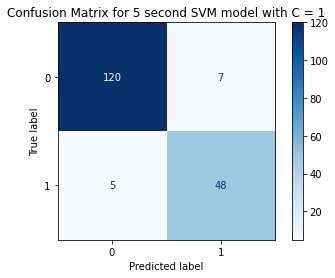

In [116]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_1)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for 5 second SVM model with C = 1')
plt.show()

In [117]:
import pickle
filename= '5 second SVM model.pkl'
pickle.dump(clf_1, open(filename, 'wb'))

In [14]:
import pickle
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


filename = '5 second Dataframe with features.pkl'
df = pd.read_pickle(filename)

X = df.iloc[:, 6:24]
Y = df['Fall']

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

filename = '5 second SVM model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
y_predicted = model.predict(x_test)


print(classification_report(y_test, y_predicted))
print(f1_score(y_test, y_predicted, average='weighted'))

d:\teddy\Documents\UNIVALI\TCC III\TCC-iii\venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       127
           1       0.87      0.91      0.89        53

    accuracy                           0.93       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.93      0.93      0.93       180

0.9336860670194003


d:\teddy\Documents\UNIVALI\TCC III\TCC-iii\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [14]:
clf_1000 = SVC(kernel= 'linear', C=1000)
x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

scores_linear_1000 = []

k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)      # Creating a Stratifiedd K fold object
# This loop can be done with one line of code using cross_val_score
for train_index, val_index in k_fold.split(x_rem, y_rem):                      # Splitting dataset into 10 fold 
    X_train, X_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index] , y_rem.iloc[val_index]

    clf_1000.fit(X_train, y_train)
    scores_linear_1000.append(clf_1000.score(X_val, y_val))

print('Linear accuracy score: ', (sum(scores_linear_1000) / len(scores_linear_1000)*100))

y_predicted_1000 = clf_1000.predict(x_test)      
print('Accuracy: ', (accuracy_score(y_test, y_predicted_1000))*100)

KeyboardInterrupt: 

# K-NN for waist

In [2]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import pandas as pd

fall_all_d = pd.read_pickle(r"D:\teddy\Documents\UNIVALI\TCC III\TCC-iii\IEEE article\5 second Dataframe with features.pkl")
X = fall_all_d.loc[:, 'Mean Acc X':'Rng Gyr Z']
Y = fall_all_d['Fall']

knn = KNN(n_neighbors= 7, weights='distance')
scores_knn = []
x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X=x_rem, y=y_rem):
    x_train, x_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index], y_rem.iloc[val_index]

    knn.fit(x_train, y_train)
    scores_knn.append(knn.score(x_val, y_val))

validation_score = (sum(scores_knn) / len(scores_knn))* 100
print(f"Validation accuracy:{validation_score: .2f}")

Validation accuracy: 87.52


In [3]:
y_predicted_knn = knn.predict(x_test)
print('Accuracy: ', (accuracy_score(y_test, y_predicted_knn))*100)

Accuracy:  83.33333333333334


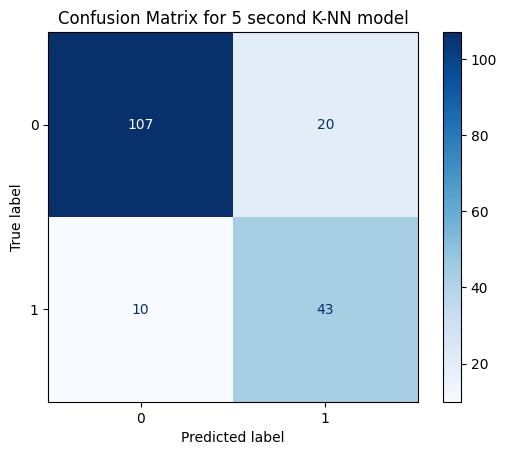

In [4]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for 5 second K-NN model')
plt.show()

In [6]:
import pickle
filename = '5 second KNN model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [17]:
filename = '5 second KNN model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
y_predicted = model.predict(x_test)


print(classification_report(y_test, y_predicted))
print(f1_score(y_test, y_predicted, average='weighted'))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       127
           1       0.68      0.81      0.74        53

    accuracy                           0.83       180
   macro avg       0.80      0.83      0.81       180
weighted avg       0.85      0.83      0.84       180

0.8371019408328623


# Ranfom Forest for Waist

In [43]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

filename = '5 second Dataframe with features.pkl'
df = pd.read_pickle(filename)

X = df.iloc[:, 6:24]
Y = df['Fall']

rf_model = RF(max_depth= 5, random_state=0)


scores_rf = []
x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X=x_rem, y=y_rem):
    x_train, x_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index], y_rem.iloc[val_index]

    rf_model.fit(x_train, y_train)
    scores_rf.append(rf_model.score(x_val, y_val))

validation_score = (sum(scores_rf) / len(scores_rf))* 100
print(f"Validation accuracy:{validation_score: .2f}")

Validation accuracy: 98.08


In [44]:
y_predicted_rf = rf_model.predict(x_test)
print('Accuracy: ', (accuracy_score(y_test, y_predicted_rf))*100)

Accuracy:  97.22222222222221


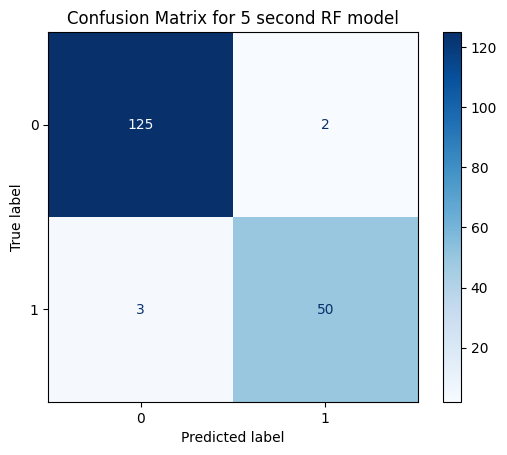

In [45]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for 5 second RF model')
plt.savefig('Confusion Matrix for 5 second RF model.svg', dpi = 300)
plt.show()

In [23]:
import pickle
filename = '5 second RF model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [24]:
filename = '5 second RF model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
y_predicted = model.predict(x_test)


print(classification_report(y_test, y_predicted))
print(f1_score(y_test, y_predicted, average='weighted'))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.96      0.94      0.95        53

    accuracy                           0.97       180
   macro avg       0.97      0.96      0.97       180
weighted avg       0.97      0.97      0.97       180

0.9721444133208839


# Dataframe for wrist detection model

In [4]:
import numpy as np
fall_all_d = pd.read_pickle(r"D:\teddy\Documents\UNIVALI\TCC III\TCC-iii\FallAllD\FallAllD.pkl")
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag,Bar
0,1,Neck,13,1,"[[4155, 55, -82], [4157, 55, -126], [4157, 50,...","[[1613, 205, 77], [1626, 202, 74], [1634, 199,...","[[3543, -780, 1995], [3537, -823, 1958], [3520...","[[1013.193859563175, 23.71569457530976], [1013..."
1,1,Neck,13,2,"[[4002, -50, 156], [4002, -38, 172], [4003, -2...","[[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...","[[3701, 401, 1960], [3746, 365, 2026], [3816, ...","[[1013.214612231942, 24.11322125434876], [1013..."
2,1,Neck,13,3,"[[3983, 40, -335], [3984, 38, -324], [3987, 34...","[[1651, 208, 63], [1652, 203, 60], [1656, 198,...","[[3849, -680, 1685], [3834, -707, 1717], [3857...","[[1013.25438772214, 24.49373892784119], [1013...."
3,1,Neck,13,4,"[[3959, 165, 197], [3953, 165, 196], [3951, 16...","[[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...","[[3565, -465, -187], [3543, -468, -176], [3553...","[[1013.167161107663, 24.72971366882324], [1013..."
4,1,Neck,13,5,"[[3750, -182, 252], [3767, -166, 259], [3781, ...","[[394, -59, 3], [397, -63, -1], [394, -66, -3]...","[[3952, 103, 1828], [3973, 133, 1809], [3972, ...","[[1013.304382379492, 25.49256420612335], [1013..."
...,...,...,...,...,...,...,...,...
6600,15,Waist,131,2,"[[3805, 827, 464], [3822, 855, 481], [3836, 80...","[[125, -157, -474], [114, -161, -460], [108, -...","[[2863, 617, 4182], [2891, 685, 4202], [2891, ...","[[1011.862824709349, 22.70812978982925], [1011..."
6601,15,Waist,132,1,"[[4019, -542, 564], [4014, -542, 564], [4016, ...","[[-19, 18, 12], [-21, 19, 10], [-24, 16, 11], ...","[[3567, 587, 1707], [3561, 493, 1684], [3551, ...","[[1011.165677955795, 24.15599847555161], [1011..."
6602,15,Waist,134,2,"[[3884, -1500, 557], [3875, -1485, 570], [3915...","[[42, 42, -8], [48, 37, -4], [49, 32, -1], [57...","[[2627, 2463, -442], [2725, 2403, -415], [2763...","[[1011.096899325944, 24.21806715250015], [1011..."
6603,15,Waist,135,1,"[[4045, -152, 405], [4043, -143, 398], [4040, ...","[[21, 7, 1], [22, 7, 3], [21, 9, 5], [22, 9, 3...","[[3521, 859, 3254], [3559, 857, 3262], [3553, ...","[[1011.146073367195, 24.40921198129654], [1011..."


In [12]:
fall_all_d['Device'].value_counts()

Device
Wrist    2515
Neck     2292
Waist    1798
Name: count, dtype: int64

In [43]:
fall_all_d = fall_all_d[fall_all_d["Device"] == "Wrist"]
fall_all_d.drop(columns=['Mag', 'Bar'], inplace=True)
fall_all_d

C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\2179939155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_all_d.drop(columns=['Mag', 'Bar'], inplace=True)


,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr
179,1,Wrist,1,1,"[[-689, 624, -3975], [-686, 625, -3974], [-682...","[[11, 21, 23], [10, 21, 23], [10, 20, 21], [13..."
180,1,Wrist,1,2,"[[-675, 896, -3920], [-669, 892, -3915], [-664...","[[10, 19, 31], [11, 19, 32], [8, 18, 33], [14,..."
181,1,Wrist,1,3,"[[-418, 1004, -3939], [-417, 1000, -3942], [-4...","[[13, 11, 37], [9, 12, 35], [11, 11, 36], [8, ..."
182,1,Wrist,1,4,"[[-764, 1106, -3848], [-763, 1109, -3848], [-7...","[[38, 20, 23], [41, 23, 25], [44, 21, 26], [42..."
183,1,Wrist,2,1,"[[-667, 605, -3968], [-667, 608, -3968], [-668...","[[16, 7, 38], [14, 6, 39], [17, 7, 38], [21, 6..."
...,...,...,...,...,...,...
6557,15,Wrist,133,1,"[[3394, 2126, -255], [3395, 2128, -256], [3399...","[[-32, -22, -16], [-29, -22, -13], [-30, -22, ..."
6558,15,Wrist,134,1,"[[3502, 1994, -459], [3505, 1992, -458], [3503...","[[-42, 5, 13], [-43, 6, 13], [-42, 3, 11], [-4..."
6559,15,Wrist,134,2,"[[3481, 1701, -740], [3451, 1681, -747], [3422...","[[-126, -130, 26], [-101, -114, 24], [-75, -10..."
6560,15,Wrist,135,1,"[[3525, 1875, -609], [3525, 1871, -599], [3521...","[[-10, 18, -4], [-10, 20, -4], [-13, 20, -4], ..."


In [44]:
fall_all_d['Fall'] = fall_all_d['ActivityID'].apply(lambda x: 1 if x > 100 else 0)
fall_all_d['Acc'] = fall_all_d['Acc'].apply(lambda x: np.around((x * 0.000244), decimals=4))
fall_all_d['Gyr'] = fall_all_d['Gyr'].apply(lambda x: np.around((x * 0.07), decimals=4))

fall_all_d

C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\564957015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_all_d['Fall'] = fall_all_d['ActivityID'].apply(lambda x: 1 if x > 100 else 0)
C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\564957015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_all_d['Acc'] = fall_all_d['Acc'].apply(lambda x: np.around((x * 0.000244), decimals=4))
C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\564957015.py:3: SettingWithCopyWarning: 
A value is trying to be 

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Fall
179,1,Wrist,1,1,"[[-0.1681, 0.1523, -0.9699], [-0.1674, 0.1525,...","[[0.77, 1.47, 1.61], [0.7, 1.47, 1.61], [0.7, ...",0
180,1,Wrist,1,2,"[[-0.1647, 0.2186, -0.9565], [-0.1632, 0.2176,...","[[0.7, 1.33, 2.17], [0.77, 1.33, 2.24], [0.56,...",0
181,1,Wrist,1,3,"[[-0.102, 0.245, -0.9611], [-0.1017, 0.244, -0...","[[0.91, 0.77, 2.59], [0.63, 0.84, 2.45], [0.77...",0
182,1,Wrist,1,4,"[[-0.1864, 0.2699, -0.9389], [-0.1862, 0.2706,...","[[2.66, 1.4, 1.61], [2.87, 1.61, 1.75], [3.08,...",0
183,1,Wrist,2,1,"[[-0.1627, 0.1476, -0.9682], [-0.1627, 0.1484,...","[[1.12, 0.49, 2.66], [0.98, 0.42, 2.73], [1.19...",0
...,...,...,...,...,...,...,...
6557,15,Wrist,133,1,"[[0.8281, 0.5187, -0.0622], [0.8284, 0.5192, -...","[[-2.24, -1.54, -1.12], [-2.03, -1.54, -0.91],...",1
6558,15,Wrist,134,1,"[[0.8545, 0.4865, -0.112], [0.8552, 0.486, -0....","[[-2.94, 0.35, 0.91], [-3.01, 0.42, 0.91], [-2...",1
6559,15,Wrist,134,2,"[[0.8494, 0.415, -0.1806], [0.842, 0.4102, -0....","[[-8.82, -9.1, 1.82], [-7.07, -7.98, 1.68], [-...",1
6560,15,Wrist,135,1,"[[0.8601, 0.4575, -0.1486], [0.8601, 0.4565, -...","[[-0.7, 1.26, -0.28], [-0.7, 1.4, -0.28], [-0....",1


In [45]:
fall_all_d.to_pickle(r"D:\teddy\Documents\UNIVALI\TCC III\TCC-iii\Dataframes\Wrist Dataframe.pkl")

In [47]:
trim_vector_values(fall_all_d, 'Acc')
trim_vector_values(fall_all_d, 'Gyr')

In [48]:
# Define functions to calculate mean, standard deviation, and range for each axis
def mean_func(x):
    return pd.DataFrame(x.tolist()).mean(axis=0)

def std_func(x):
    return pd.DataFrame(x.tolist()).std(axis=0)

def range_func(x):
    return pd.DataFrame(x.tolist()).max(axis=0) - pd.DataFrame(x.tolist()).min(axis=0)

# Apply functions to each row of the accelerometer and gyroscope data
for sensor in ['Acc', 'Gyr']:
    for axis in range(3):
        col_name_prefix = sensor
        col_name_suffix = ['X', 'Y', 'Z'][axis]
        col_names = [f'Mean {col_name_prefix} {col_name_suffix}', f'Std {col_name_prefix} {col_name_suffix}', f'Rng {col_name_prefix} {col_name_suffix}']
        temp_df = fall_all_d[sensor].apply(lambda x: pd.Series([mean_func(x)[axis], std_func(x)[axis], range_func(x)[axis]]))
        temp_df.columns = col_names
        fall_all_d[col_names] = temp_df


C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\4249951002.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_all_d[col_names] = temp_df
C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\4249951002.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_all_d[col_names] = temp_df
C:\Users\teddy\AppData\Local\Temp\ipykernel_8632\4249951002.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Reordering columns to keep the pattern used before

In [49]:
new_col_order = ['SubjectID', 'Device', 'ActivityID', 'TrialNo', 'Acc', 'Gyr',
                 'Mean Acc X', 'Mean Acc Y', 'Mean Acc Z', 'Std Acc X', 'Std Acc Y', 'Std Acc Z', 'Rng Acc X', 'Rng Acc Y', 'Rng Acc Z', 
                 'Mean Gyr X', 'Mean Gyr Y', 'Mean Gyr Z', 'Std Gyr X', 'Std Gyr Y', 'Std Gyr Z', 'Rng Gyr X', 'Rng Gyr Y', 'Rng Gyr Z', 'Fall']
fall_all_d = fall_all_d.reindex(columns=new_col_order)
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,...,Rng Acc Z,Mean Gyr X,Mean Gyr Y,Mean Gyr Z,Std Gyr X,Std Gyr Y,Std Gyr Z,Rng Gyr X,Rng Gyr Y,Rng Gyr Z
179,1,Wrist,1,1,"[[-0.1357, 0.1452, -0.9694], [-0.1364, 0.1464,...","[[3.01, 4.06, 0.7], [3.22, 4.13, 0.49], [3.29,...",-0.490277,0.464808,-0.438924,0.309874,...,2.5757,15.560176,7.248294,8.596647,53.761399,28.352116,22.337136,331.87,178.99,137.83
180,1,Wrist,1,2,"[[-0.1681, 0.2286, -0.9518], [-0.1681, 0.2306,...","[[1.26, 1.19, 1.75], [1.19, 1.19, 1.82], [1.26...",-0.498892,0.494977,-0.400150,0.306017,...,2.4722,17.249765,4.784588,8.020647,58.948988,30.753716,20.692041,404.46,179.55,125.79
181,1,Wrist,1,3,"[[-0.103, 0.2491, -0.9555], [-0.101, 0.2462, -...","[[1.19, 2.38, 0.91], [1.4, 2.31, 0.98], [1.75,...",-0.485403,0.463002,-0.455091,0.355143,...,2.8246,16.670294,4.936647,9.472824,55.397940,41.083344,26.732399,390.88,240.52,174.86
182,1,Wrist,1,4,"[[-0.2011, 0.3067, -0.9289], [-0.2018, 0.3074,...","[[1.96, 1.33, 1.89], [1.82, 1.33, 1.68], [2.03...",-0.528606,0.479454,-0.464089,0.316615,...,3.5097,16.088235,4.039529,8.831941,64.879802,35.288003,26.822908,492.45,261.45,175.77
183,1,Wrist,2,1,"[[-0.6805, 0.6849, -0.1662], [-0.7337, 0.6771,...","[[-6.09, 2.52, -14.84], [-4.97, 2.73, -13.3], ...",-0.771968,0.641211,-0.023043,0.164835,...,2.3883,-0.401647,3.731941,3.737176,34.622234,34.699679,15.241245,274.33,155.26,97.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,15,Wrist,133,1,"[[0.845, 0.5158, -0.0442], [0.8447, 0.5144, -0...","[[-2.03, 1.26, 2.17], [-2.1, 1.12, 2.24], [-2....",-0.088579,0.285762,-0.362977,0.873317,...,2.9095,5.411412,10.348176,31.700765,90.697044,73.112326,62.615338,596.05,536.13,422.73
6558,15,Wrist,134,1,"[[0.8345, 0.5031, -0.1293], [0.8342, 0.5031, -...","[[-3.71, -1.33, -3.5], [-3.71, -1.33, -3.43], ...",0.312234,0.551229,0.224834,0.644167,...,7.1165,17.082118,8.694176,12.869000,77.329822,38.092134,63.769878,543.97,519.26,614.32
6559,15,Wrist,134,2,"[[0.8464, 0.4736, -0.1688], [0.8452, 0.4746, -...","[[-0.49, 1.68, 0.42], [-0.56, 1.47, 0.56], [-0...",0.803171,0.098222,-0.283884,0.473591,...,4.3830,-11.669647,2.806235,-7.845353,58.027923,46.502091,58.915458,540.26,318.08,493.15
6560,15,Wrist,135,1,"[[0.7813, 0.5192, -0.3006], [0.7549, 0.5205, -...","[[-15.82, -66.57, -31.78], [-20.65, -67.27, -3...",0.839134,0.336931,-0.378522,0.310676,...,2.6581,1.374588,6.470588,-2.602882,42.220991,21.420760,28.603414,445.06,174.86,250.95


In [51]:
fall_all_d.to_pickle("5 second Wrist DataFrame with features.pkl")

# SVM model for Wrist detection device

In [3]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
fall_all_d = pd.read_pickle('5 second Wrist DataFrame with features.pkl')
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,...,Mean Gyr X,Mean Gyr Y,Mean Gyr Z,Std Gyr X,Std Gyr Y,Std Gyr Z,Rng Gyr X,Rng Gyr Y,Rng Gyr Z,Fall
179,1,Wrist,1,1,"[[-0.1357, 0.1452, -0.9694], [-0.1364, 0.1464,...","[[3.01, 4.06, 0.7], [3.22, 4.13, 0.49], [3.29,...",-0.490277,0.464808,-0.438924,0.309874,...,15.560176,7.248294,8.596647,53.761399,28.352116,22.337136,331.87,178.99,137.83,0
180,1,Wrist,1,2,"[[-0.1681, 0.2286, -0.9518], [-0.1681, 0.2306,...","[[1.26, 1.19, 1.75], [1.19, 1.19, 1.82], [1.26...",-0.498892,0.494977,-0.400150,0.306017,...,17.249765,4.784588,8.020647,58.948988,30.753716,20.692041,404.46,179.55,125.79,0
181,1,Wrist,1,3,"[[-0.103, 0.2491, -0.9555], [-0.101, 0.2462, -...","[[1.19, 2.38, 0.91], [1.4, 2.31, 0.98], [1.75,...",-0.485403,0.463002,-0.455091,0.355143,...,16.670294,4.936647,9.472824,55.397940,41.083344,26.732399,390.88,240.52,174.86,0
182,1,Wrist,1,4,"[[-0.2011, 0.3067, -0.9289], [-0.2018, 0.3074,...","[[1.96, 1.33, 1.89], [1.82, 1.33, 1.68], [2.03...",-0.528606,0.479454,-0.464089,0.316615,...,16.088235,4.039529,8.831941,64.879802,35.288003,26.822908,492.45,261.45,175.77,0
183,1,Wrist,2,1,"[[-0.6805, 0.6849, -0.1662], [-0.7337, 0.6771,...","[[-6.09, 2.52, -14.84], [-4.97, 2.73, -13.3], ...",-0.771968,0.641211,-0.023043,0.164835,...,-0.401647,3.731941,3.737176,34.622234,34.699679,15.241245,274.33,155.26,97.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,15,Wrist,133,1,"[[0.845, 0.5158, -0.0442], [0.8447, 0.5144, -0...","[[-2.03, 1.26, 2.17], [-2.1, 1.12, 2.24], [-2....",-0.088579,0.285762,-0.362977,0.873317,...,5.411412,10.348176,31.700765,90.697044,73.112326,62.615338,596.05,536.13,422.73,1
6558,15,Wrist,134,1,"[[0.8345, 0.5031, -0.1293], [0.8342, 0.5031, -...","[[-3.71, -1.33, -3.5], [-3.71, -1.33, -3.43], ...",0.312234,0.551229,0.224834,0.644167,...,17.082118,8.694176,12.869000,77.329822,38.092134,63.769878,543.97,519.26,614.32,1
6559,15,Wrist,134,2,"[[0.8464, 0.4736, -0.1688], [0.8452, 0.4746, -...","[[-0.49, 1.68, 0.42], [-0.56, 1.47, 0.56], [-0...",0.803171,0.098222,-0.283884,0.473591,...,-11.669647,2.806235,-7.845353,58.027923,46.502091,58.915458,540.26,318.08,493.15,1
6560,15,Wrist,135,1,"[[0.7813, 0.5192, -0.3006], [0.7549, 0.5205, -...","[[-15.82, -66.57, -31.78], [-20.65, -67.27, -3...",0.839134,0.336931,-0.378522,0.310676,...,1.374588,6.470588,-2.602882,42.220991,21.420760,28.603414,445.06,174.86,250.95,1


In [5]:
X = fall_all_d.loc[:, 'Mean Acc X':'Rng Gyr Z']
Y = fall_all_d['Fall']
X

,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,Std Acc Y,Std Acc Z,Rng Acc X,Rng Acc Y,Rng Acc Z,Mean Gyr X,Mean Gyr Y,Mean Gyr Z,Std Gyr X,Std Gyr Y,Std Gyr Z,Rng Gyr X,Rng Gyr Y,Rng Gyr Z
179,-0.490277,0.464808,-0.438924,0.309874,0.269106,0.541512,1.7141,1.4479,2.5757,15.560176,7.248294,8.596647,53.761399,28.352116,22.337136,331.87,178.99,137.83
180,-0.498892,0.494977,-0.400150,0.306017,0.247815,0.585216,1.2388,1.2080,2.4722,17.249765,4.784588,8.020647,58.948988,30.753716,20.692041,404.46,179.55,125.79
181,-0.485403,0.463002,-0.455091,0.355143,0.226698,0.557316,1.5977,1.4188,2.8246,16.670294,4.936647,9.472824,55.397940,41.083344,26.732399,390.88,240.52,174.86
182,-0.528606,0.479454,-0.464089,0.316615,0.214438,0.569111,1.3076,1.2458,3.5097,16.088235,4.039529,8.831941,64.879802,35.288003,26.822908,492.45,261.45,175.77
183,-0.771968,0.641211,-0.023043,0.164835,0.152985,0.345996,1.4206,1.0299,2.3883,-0.401647,3.731941,3.737176,34.622234,34.699679,15.241245,274.33,155.26,97.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,-0.088579,0.285762,-0.362977,0.873317,0.646532,0.473298,4.8839,4.5733,2.9095,5.411412,10.348176,31.700765,90.697044,73.112326,62.615338,596.05,536.13,422.73
6558,0.312234,0.551229,0.224834,0.644167,0.388531,0.563773,8.2126,7.1577,7.1165,17.082118,8.694176,12.869000,77.329822,38.092134,63.769878,543.97,519.26,614.32
6559,0.803171,0.098222,-0.283884,0.473591,0.582135,0.373639,6.1383,5.7787,4.3830,-11.669647,2.806235,-7.845353,58.027923,46.502091,58.915458,540.26,318.08,493.15
6560,0.839134,0.336931,-0.378522,0.310676,0.168741,0.293073,4.4189,2.0962,2.6581,1.374588,6.470588,-2.602882,42.220991,21.420760,28.603414,445.06,174.86,250.95


In [4]:
clf_1 = SVC(kernel= 'linear', C=1)

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 70)


scores_linear_1 = []

k_fold = StratifiedKFold(n_splits=10,shuffle=True, random_state=99)      # Creating a Stratifiedd K fold object
# This loop can be done with one line of code using cross_val_score
for train_index, val_index in k_fold.split(x_rem, y_rem):                      # Splitting dataset into 10 fold 
    X_train, X_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index] , y_rem.iloc[val_index]

    clf_1.fit(X_train, y_train)
    scores_linear_1.append(clf_1.score(X_val, y_val))

print('Linear accuracy score: ', (sum(scores_linear_1) / len(scores_linear_1)*100))

y_predicted_1 = clf_1.predict(x_test)      
print('Accuracy: ', (accuracy_score(y_test, y_predicted_1))*100)

print("Classification report\n", classification_report(y_test, y_predicted_1))

Linear accuracy score:  93.19675646173637
Accuracy:  93.25396825396825
Classification report               precision    recall  f1-score   support

           0       0.94      0.98      0.96       208
           1       0.86      0.73      0.79        44

    accuracy                           0.93       252
   macro avg       0.90      0.85      0.87       252
weighted avg       0.93      0.93      0.93       252



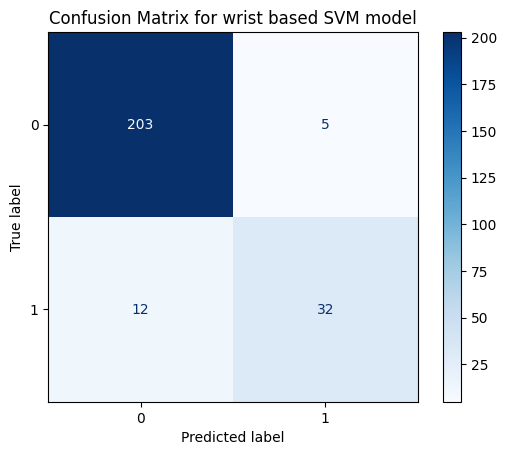

In [8]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_1)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for wrist based SVM model')
plt.show()

In [6]:
import pickle
filename= '5 second Wrist SVM model.pkl'
pickle.dump(clf_1, open(filename, 'wb'))

In [25]:
import pandas as pd

df = pd.read_pickle('5 second Wrist DataFrame with features.pkl')
X, Y = df.loc[:, 'Mean Acc X':'Rng Gyr Z'], df['Fall']

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 70)


In [26]:
filename = '5 second Wrist SVM model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
y_predicted = model.predict(x_test)


print(classification_report(y_test, y_predicted))
print(f1_score(y_test, y_predicted, average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       208
           1       0.86      0.73      0.79        44

    accuracy                           0.93       252
   macro avg       0.90      0.85      0.87       252
weighted avg       0.93      0.93      0.93       252

0.9301829128464274


# K-NN model for wrist detection

In [1]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import pandas as pd

fall_all_d = pd.read_pickle(r"D:\teddy\Documents\UNIVALI\TCC III\TCC-iii\IEEE article\5 second Wrist DataFrame with features.pkl")
X = fall_all_d.loc[:, 'Mean Acc X':'Rng Gyr Z']
Y = fall_all_d['Fall']

knn = KNN(n_neighbors= 7, weights='distance')
scores_knn = []
x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X=x_rem, y=y_rem):
    x_train, x_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index], y_rem.iloc[val_index]

    knn.fit(x_train, y_train)
    scores_knn.append(knn.score(x_val, y_val))

validation_score = (sum(scores_knn) / len(scores_knn))* 100
print(f"Validation accuracy:{validation_score: .2f}")

Validation accuracy: 87.41


In [2]:
y_predicted_knn = knn.predict(x_test)
print('Accuracy: ', (accuracy_score(y_test, y_predicted_knn))*100)

Accuracy:  85.71428571428571


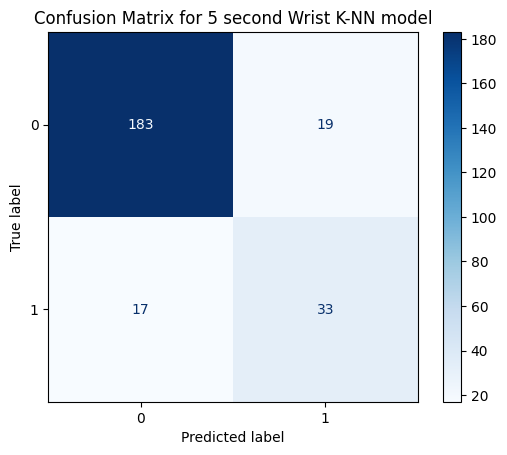

In [3]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for 5 second Wrist K-NN model')
plt.show()

In [4]:
import pickle
filename = '5 second Wrist KNN model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [28]:
import pandas as pd

df = pd.read_pickle('5 second Wrist DataFrame with features.pkl')
X, Y = df.loc[:, 'Mean Acc X':'Rng Gyr Z'], df['Fall']

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

In [29]:
filename = '5 second Wrist KNN model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
y_predicted = model.predict(x_test)


print(classification_report(y_test, y_predicted))
print(f1_score(y_test, y_predicted, average='weighted'))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       202
           1       0.63      0.66      0.65        50

    accuracy                           0.86       252
   macro avg       0.77      0.78      0.78       252
weighted avg       0.86      0.86      0.86       252

0.8581880513399389


# Random Forest for Wrist

In [31]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import pandas as pd

rf_model = RF(max_depth= 5, random_state=0)
fall_all_d = pd.read_pickle('5 second Wrist DataFrame with features.pkl')
X = fall_all_d.loc[:, 'Mean Acc X':'Rng Gyr Z']
Y = fall_all_d['Fall']

scores_rf = []
x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 27)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X=x_rem, y=y_rem):
    x_train, x_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index], y_rem.iloc[val_index]

    rf_model.fit(x_train, y_train)
    scores_rf.append(rf_model.score(x_val, y_val))

validation_score = (sum(scores_rf) / len(scores_rf))* 100
print(f"Validation accuracy:{validation_score: .2f}")

Validation accuracy: 93.41


In [32]:
y_predicted_rf = rf_model.predict(x_test)
print('Accuracy: ', (accuracy_score(y_test, y_predicted_rf))*100)

Accuracy:  92.85714285714286


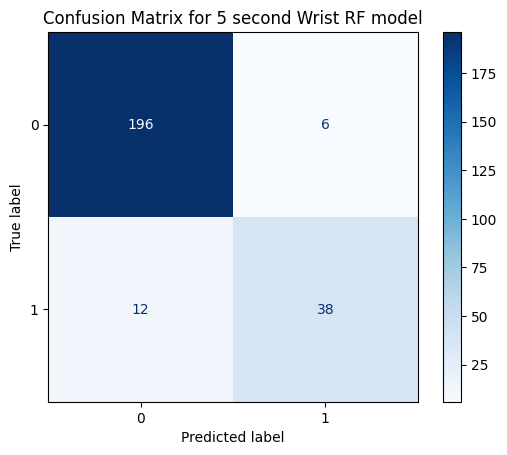

<Figure size 640x480 with 0 Axes>

In [37]:
con_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for 5 second Wrist RF model')
plt.show()
plt.savefig('5 second Wrist RF model.jpeg', dpi = 300)

In [34]:
import pickle
filename = '5 second Wrist RF model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [35]:
filename = '5 second Wrist RF model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
y_predicted = model.predict(x_test)


print(classification_report(y_test, y_predicted))
print(f1_score(y_test, y_predicted, average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       202
           1       0.86      0.76      0.81        50

    accuracy                           0.93       252
   macro avg       0.90      0.87      0.88       252
weighted avg       0.93      0.93      0.93       252

0.9268144413966936


# Working with 20 seconds of data

In [6]:
fall_all_d = pd.read_pickle(r'D:\teddy\Documents\UNIVALI\TCC III\TCC-iii\Dataframes\Wrist Dataframe.pkl')
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Fall
179,1,Wrist,1,1,"[[-0.1681, 0.1523, -0.9699], [-0.1674, 0.1525,...","[[0.77, 1.47, 1.61], [0.7, 1.47, 1.61], [0.7, ...",0
180,1,Wrist,1,2,"[[-0.1647, 0.2186, -0.9565], [-0.1632, 0.2176,...","[[0.7, 1.33, 2.17], [0.77, 1.33, 2.24], [0.56,...",0
181,1,Wrist,1,3,"[[-0.102, 0.245, -0.9611], [-0.1017, 0.244, -0...","[[0.91, 0.77, 2.59], [0.63, 0.84, 2.45], [0.77...",0
182,1,Wrist,1,4,"[[-0.1864, 0.2699, -0.9389], [-0.1862, 0.2706,...","[[2.66, 1.4, 1.61], [2.87, 1.61, 1.75], [3.08,...",0
183,1,Wrist,2,1,"[[-0.1627, 0.1476, -0.9682], [-0.1627, 0.1484,...","[[1.12, 0.49, 2.66], [0.98, 0.42, 2.73], [1.19...",0
...,...,...,...,...,...,...,...
6557,15,Wrist,133,1,"[[0.8281, 0.5187, -0.0622], [0.8284, 0.5192, -...","[[-2.24, -1.54, -1.12], [-2.03, -1.54, -0.91],...",1
6558,15,Wrist,134,1,"[[0.8545, 0.4865, -0.112], [0.8552, 0.486, -0....","[[-2.94, 0.35, 0.91], [-3.01, 0.42, 0.91], [-2...",1
6559,15,Wrist,134,2,"[[0.8494, 0.415, -0.1806], [0.842, 0.4102, -0....","[[-8.82, -9.1, 1.82], [-7.07, -7.98, 1.68], [-...",1
6560,15,Wrist,135,1,"[[0.8601, 0.4575, -0.1486], [0.8601, 0.4565, -...","[[-0.7, 1.26, -0.28], [-0.7, 1.4, -0.28], [-0....",1


In [7]:
# Define functions to calculate mean, standard deviation, and range for each axis
def mean_func(x):
    return pd.DataFrame(x.tolist()).mean(axis=0)

def std_func(x):
    return pd.DataFrame(x.tolist()).std(axis=0)

def range_func(x):
    return pd.DataFrame(x.tolist()).max(axis=0) - pd.DataFrame(x.tolist()).min(axis=0)

In [8]:
# Apply functions to each row of the accelerometer and gyroscope data
for sensor in ['Acc', 'Gyr']:
    for axis in range(3):
        col_name_prefix = sensor
        col_name_suffix = ['X', 'Y', 'Z'][axis]
        col_names = [f'Mean {col_name_prefix} {col_name_suffix}', f'Std {col_name_prefix} {col_name_suffix}', f'Rng {col_name_prefix} {col_name_suffix}']
        temp_df = fall_all_d[sensor].apply(lambda x: pd.Series([mean_func(x)[axis], std_func(x)[axis], range_func(x)[axis]]))
        temp_df.columns = col_names
        fall_all_d[col_names] = temp_df

new_col_order = ['SubjectID', 'Device', 'ActivityID', 'TrialNo', 'Acc', 'Gyr',
                 'Mean Acc X', 'Mean Acc Y', 'Mean Acc Z', 'Std Acc X', 'Std Acc Y', 'Std Acc Z', 'Rng Acc X', 'Rng Acc Y', 'Rng Acc Z', 
                 'Mean Gyr X', 'Mean Gyr Y', 'Mean Gyr Z', 'Std Gyr X', 'Std Gyr Y', 'Std Gyr Z', 'Rng Gyr X', 'Rng Gyr Y', 'Rng Gyr Z', 'Fall']
fall_all_d = fall_all_d.reindex(columns=new_col_order)
fall_all_d

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mean Acc X,Mean Acc Y,Mean Acc Z,Std Acc X,...,Mean Gyr X,Mean Gyr Y,Mean Gyr Z,Std Gyr X,Std Gyr Y,Std Gyr Z,Rng Gyr X,Rng Gyr Y,Rng Gyr Z,Fall
179,1,Wrist,1,1,"[[-0.1681, 0.1523, -0.9699], [-0.1674, 0.1525,...","[[0.77, 1.47, 1.61], [0.7, 1.47, 1.61], [0.7, ...",-0.374220,0.336987,-0.650460,0.297577,...,1.535647,1.188000,2.268471,39.244450,22.942086,16.267507,448.91,179.34,170.66,0
180,1,Wrist,1,2,"[[-0.1647, 0.2186, -0.9565], [-0.1632, 0.2176,...","[[0.7, 1.33, 2.17], [0.77, 1.33, 2.24], [0.56,...",-0.327692,0.362209,-0.691593,0.267168,...,1.721353,0.860985,2.195338,40.503076,22.005304,13.429004,535.29,196.28,137.62,0
181,1,Wrist,1,3,"[[-0.102, 0.245, -0.9611], [-0.1017, 0.244, -0...","[[0.91, 0.77, 2.59], [0.63, 0.84, 2.45], [0.77...",-0.338146,0.351205,-0.681627,0.327846,...,2.036412,0.393250,2.622000,38.647227,29.710158,18.319270,476.00,246.05,197.68,0
182,1,Wrist,1,4,"[[-0.1864, 0.2699, -0.9389], [-0.1862, 0.2706,...","[[2.66, 1.4, 1.61], [2.87, 1.61, 1.75], [3.08,...",-0.331517,0.373723,-0.734121,0.269562,...,1.998132,0.863985,1.499647,42.329475,23.049501,20.062538,630.98,261.45,254.45,0
183,1,Wrist,2,1,"[[-0.1627, 0.1476, -0.9682], [-0.1627, 0.1484,...","[[1.12, 0.49, 2.66], [0.98, 0.42, 2.73], [1.19...",-0.373861,0.347705,-0.648434,0.297827,...,1.561515,1.206706,2.250868,39.243960,22.942733,16.268056,448.91,179.34,170.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,15,Wrist,133,1,"[[0.8281, 0.5187, -0.0622], [0.8284, 0.5192, -...","[[-2.24, -1.54, -1.12], [-2.03, -1.54, -0.91],...",0.178557,0.453571,-0.367207,0.692127,...,0.799853,3.830985,3.753838,46.153114,37.034084,48.585703,596.05,536.13,605.78,1
6558,15,Wrist,134,1,"[[0.8545, 0.4865, -0.112], [0.8552, 0.486, -0....","[[-2.94, 0.35, 0.91], [-3.01, 0.42, 0.91], [-2...",0.309395,0.531299,0.316759,0.562891,...,3.691632,3.238338,3.551279,39.432320,19.319234,32.339043,543.97,519.26,614.32,1
6559,15,Wrist,134,2,"[[0.8494, 0.415, -0.1806], [0.842, 0.4102, -0....","[[-8.82, -9.1, 1.82], [-7.07, -7.98, 1.68], [-...",0.801202,0.021358,-0.299956,0.240342,...,-3.306603,1.790676,-1.676868,29.523943,23.303889,29.738175,540.26,318.08,493.15,1
6560,15,Wrist,135,1,"[[0.8601, 0.4575, -0.1486], [0.8601, 0.4565, -...","[[-0.7, 1.26, -0.28], [-0.7, 1.4, -0.28], [-0....",0.833614,0.347285,-0.343428,0.157257,...,-0.883426,3.132809,-0.788206,21.311506,11.328546,14.483792,445.06,174.86,250.95,1


In [9]:
X = fall_all_d.loc[:, 'Mean Acc X' : 'Rng Gyr Z']
Y = fall_all_d['Fall']

In [10]:
clf_1 = SVC(kernel= 'linear', C=1)

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 70)


scores_linear_1 = []

k_fold = StratifiedKFold(n_splits=3,shuffle=True, random_state=99)      # Creating a Stratifiedd K fold object
# This loop can be done with one line of code using cross_val_score
for train_index, val_index in k_fold.split(x_rem, y_rem):                      # Splitting dataset into 10 fold 
    X_train, X_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index] , y_rem.iloc[val_index]

    clf_1.fit(X_train, y_train)
    scores_linear_1.append(clf_1.score(X_val, y_val))

print('Linear accuracy score: ', (sum(scores_linear_1) / len(scores_linear_1)*100))

y_predicted_1 = clf_1.predict(x_test)      
print('Accuracy: ', (accuracy_score(y_test, y_predicted_1))*100)

print("Classification report\n", classification_report(y_test, y_predicted_1))

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors= 7, weights='distance')
scores_knn = []

x_rem, x_test, y_rem, y_test = train_test_split(X, Y, train_size= 0.9, test_size= 0.1, random_state= 70)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X=x_rem, y=y_rem):
    x_train, x_val = x_rem.iloc[train_index], x_rem.iloc[val_index]
    y_train, y_val = y_rem.iloc[train_index], y_rem.iloc[val_index]

    knn.fit(x_train, y_train)
    scores_knn.append(knn.score(x_val, y_val))

validation_score = (sum(scores_knn) / len(scores_knn))* 100
print(f"Validation accuracy:{validation_score: .2f}")

Validation accuracy: 85.55


In [15]:
y_predicted_knn = knn.predict(x_test)
print('Accuracy: ', (accuracy_score(y_test, y_predicted_knn))*100)

Accuracy:  86.11111111111111
